<a href="https://colab.research.google.com/github/msjun23/Deep-Learning-from-Scratch/blob/main/Chapter4/2_numerical_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수치 미분

In [1]:
# 너무 작은 수(소수점 8자리 이하)의 반올리 오차
import numpy as np

np.float32(1e-50)

0.0

In [2]:
# 수치 미분 예시
def numerical_diff(f, x):
  h = 1e-4    # 0.0001
  return (f(x + h) - f(x - h)) / (2 * h)

> - 해석적 미분 : 수식을 전개해 미분. 수학 시간에 배운 것
> - 수치 미분 : 아주 작은 차분으로 미분하여 근사치를 구하는 것

In [3]:
# y = 0.01x^2 + 0.1x
def function_1(x):
  return 0.01 * x**2 + 0.1 * x

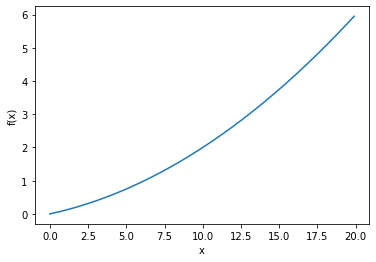

In [4]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [5]:
# 수치 미분 예시
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


---

# 편미분

In [6]:
# f(x_0, x_1) = x_0^2 + x_1^2
def function_2(x):
  return x[0]**2 + x[1]**2
  # return np.sum(x**2)

In [7]:
# x_0 = 3, x_1 = 4 일 때, x_0에 대한 편미분
def function_tmp1(x0):
  return x0 * x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [8]:
# x_0 = 3, x_1 = 4 일 때, x_1에 대한 편미분
def function_tmp2(x1):
  return 3.0**2.0 + x1 * x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


# 기울기(Gradient)

모든 편미분을 **벡터**로 정리한 것을 기울기(gradient)라고 한다.

In [9]:
def numerical_gradient(f, x):
  h = 1e-4    # 0.0001
  grad = np.zeros_like(x)   # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x + h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x - h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val    # 값 복원

  return grad

In [10]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


기울기는 방향을 가진 벡터(화살표)로 그려진다. 이때 기울기의 결과에 마이너스를 붙인 벡터를 그려보면, 기울기가 가리키는 방향은 각 장소에서 **함수의 출력 값을 가장 크게 줄이는 방향**이다.

---

# 경사법(경사 하강법)

기울기를 이용해 함수의 최솟값을 찾는것이 경사법, **경사 하강법**이다. 경사법을 수식으로 나타내면 아래와 같다.
$$x_0=x_0-\eta\frac{\partial{f}}{\partial{x_0}}
\\x_1=x_1-\eta\frac{\partial{f}}{\partial{x_1}}$$

여기서 $\eta$(eta, 에타)는 갱신하는 양을 나타낸다. 이를 신경망에서는 **학습률(learning rate)**라고 한다. 학습률은 한 번의 학습으로 얼마나 학습을 진행하나, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이다.

여기서 learning rate는 미리 특정 값으로 정해두는 **하이퍼파라미터(hyperparameter)**이다.

In [11]:
# 경사 하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    
  return x

In [12]:
# 경사 하강법으로 f(x_0, x_1) = x_0^2 + x_1^2 의 최솟값 구하기
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2,init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


최종 결과는 거의 (0, 0)에 가까운 결과이다.

학습률은 너무 크거나 작지 않게 잘 조절하는 것이 중요하다. 학습률이 너무 크면 큰 값으로 발산해버리고, 반대로 너무 작으면 거의 갱신되지 않은 채 끝나버린다.

In [13]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

[-2.58983747e+13 -1.29524862e+12]


In [14]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]


신경망 학습에서도 기울기를 구해야 한다. 여기서의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 가중치가 $\mathbf{W}$, 손실 함수가 $L$인 신경망에서 경사(기울기)는 $\frac{\partial{L}}{\partial{\mathbf{W}}}$로 나타낼 수 있다.

$$\mathbf{W}=\begin{pmatrix}
w_{11} &w_{12}  &w_{13} \\ 
w_{21} &w_{22}  &w_{23} 
\end{pmatrix}
\\\frac{\partial{L}}{\partial{\mathbf{W}}}=\begin{pmatrix}
\frac{\partial{L}}{\partial{\mathbf{W_{11}}}} &\frac{\partial{L}}{\partial{\mathbf{W_{12}}}}  &\frac{\partial{L}}{\partial{\mathbf{W_{13}}}} \\ 
\frac{\partial{L}}{\partial{\mathbf{W_{21}}}} &\frac{\partial{L}}{\partial{\mathbf{W_{22}}}}  &\frac{\partial{L}}{\partial{\mathbf{W_{23}}}} 
\end{pmatrix}$$

여기서 각 원소는 각각의 원소에 관한 편미분이다. 예를 들어 1행 1열의 $\frac{\partial{L}}{\partial{\mathbf{W_{11}}}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하느냐를 나타냅니다. 이때 중요한 것은 $\mathbf{W}$와 $\frac{\partial{L}}{\partial{\mathbf{W}}}$의 형상이 모두 같다는 것이다.

In [15]:
# simpleNet 클래스 구현
import sys, os
sys.path.append(os.pardir)
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [16]:
net = simpleNet()
print(net.W)    # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))    # 최댓값의 인덱스

t = np.array([0, 0, 1])   # 정답 레이블
net.loss(x, t)

[[-1.12071411 -0.63606457  0.07759607]
 [ 1.39299078  0.80447731 -0.50590284]]
[ 0.58126323  0.34239084 -0.40875492]
0


1.7597022354288034

In [17]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.27789529  0.21884682 -0.49674211]
 [ 0.41684294  0.32827022 -0.74511317]]


In [18]:
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.27789529  0.21884682 -0.49674211]
 [ 0.41684294  0.32827022 -0.74511317]]
